In [1]:
! pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/22/47/9350b2eeeaef8c0fd3ec3505c8a0481b576845b3df0d71c76f989c23d3c6/ucimlrepo-0.0.6-py3-none-any.whl.metadata


In [4]:
from ucimlrepo import fetch_ucirepo 

In [ ]:
#I love cooking :) I have chosen a mushroom database, the target variable is whether the mushroom
#is poisonous or not based on many features of the mush. So I will ultimately create a binary classification model
#for my mushroom data.

In [5]:
mushroom = fetch_ucirepo(id=73) 

In [6]:
X = mushroom.data.features
y = mushroom.data.targets 

In [111]:
#X.join(y).to_csv('mushroom_project.csv')

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
'''
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
'''

'\n     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s\n     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s\n     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y\n     4. bruises?:                 bruises=t,no=f\n     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s\n     6. gill-attachment:          attached=a,descending=d,free=f,notched=n\n     7. gill-spacing:             close=c,crowded=w,distant=d\n     8. gill-size:                broad=b,narrow=n\n     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y\n    10. stalk-shape:              enlarging=e,tapering=t\n    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?\n    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s\n    1

In [12]:
# ^ handy variable key :)

In [13]:
X.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [14]:
#oh no, only about 8k lines of data total & the 'stalk-root' column is missing almost 1/3 of data.
#my options are to either drop the column which could be reasonable since there are so many other features
#or have more fun and attempt to infer the values of the missing ones.

In [15]:
df_infer = pd.get_dummies(X.drop(columns = ['stalk-root'])).assign(stalk_root = X['stalk-root'].values)
df_infer_train = df_infer[lambda x: ~x['stalk_root'].isna()]
df_infer_test = df_infer[lambda x: x['stalk_root'].isna()]

In [16]:
#hehe I infer. I am creating another model to infer the missing data from the blank fields. I've
#created dummy variables for every feature except stalk-root and have done a training/testing split depending on 
#where the null values are in the stalk_root column.

In [17]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(df_infer_train.drop(columns = ['stalk_root']), df_infer_train.stalk_root) 
df_infer_test['stalk_root'] = svm_model_linear.predict(df_infer_test.drop(columns = ['stalk_root'])) 

/var/folders/pv/3z_80cxd7fzbngc2pflx3yp40000gn/T/ipykernel_57722/1859758177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_infer_test['stalk_root'] = svm_model_linear.predict(df_infer_test.drop(columns = ['stalk_root']))


In [18]:
#I am fitting a model to predict stalk_root based on the rest of the dataset.

In [19]:
X_infer = pd.concat([df_infer_train,df_infer_test])
X_infer_cat = X_infer.drop(columns = ['stalk_root']).join(pd.get_dummies(X_infer[['stalk_root']]))

In [20]:
#and now I have to circle back and join this new data to the original df & dummify the now complete 
#stalk_root column

In [21]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_infer_cat, y, test_size = 0.2, random_state = 33)

In [22]:
#why random forest you say? because this dataset has many multi-class features, it has no null values (a requirement of forest)
#It is a very manageable size & I just enjoyed this chapter of the textbook.

In [23]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 33)
classifier.fit(X_train, y_train)

/Users/briannahendon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=33)

In [24]:
#I am planting my forest in the above step (training my model)

In [25]:
predictions = classifier.predict(X_test)

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.87      0.85      0.86       831
           p       0.84      0.87      0.86       794

    accuracy                           0.86      1625
   macro avg       0.86      0.86      0.86      1625
weighted avg       0.86      0.86      0.86      1625



In [27]:
#well well weeeeell looks like someone has made a decent model, poisonous represents a "positive" result so 
#considering this result would kill you, precision is the most important measurement. 
#when poisonous is positive result, the model accurately predicts 84% of the time. So in a family of 5, you will
#only lose <1 full family member to a false negative.

In [28]:
from sklearn import metrics

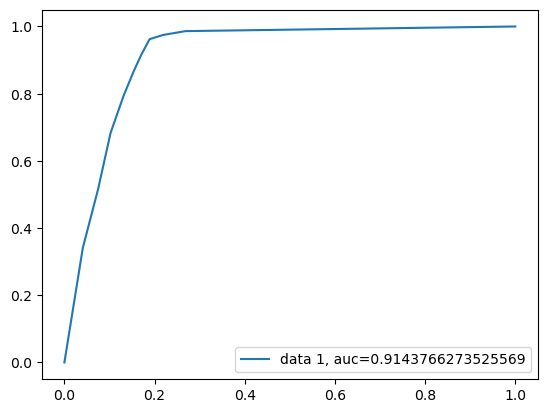

In [29]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test.replace({'e':0,'p':1}),  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [107]:
y_test.replace({'e':0,'p':1})

,poisonous
851,0
408,0
4061,0
2381,0
1523,0
...,...
605,0
4877,1
5223,0
1930,1


In [ ]:
#time to measure feature importance, just to see if stalk-root ever even mattered

In [30]:
importances = classifier.feature_importances_

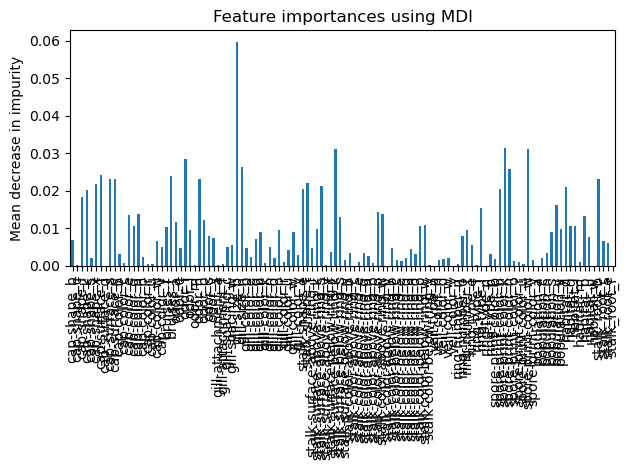

In [39]:
feature_names = X_infer_cat.columns
classifier_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
classifier_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
#Ok I can't read this and don't know how to fix it. so instead I will print out the top 20 relevant features

In [48]:
(pd.DataFrame(classifier_importances)
     .reset_index()
     .rename(columns = {0: 'imp','index':'features'})
     .sort_values(['imp'], ascending = False)
     .head(20)
)

,features,imp
35,gill-size_b,0.059826
92,spore-print-color_k,0.031327
97,spore-print-color_w,0.031255
56,stalk-surface-below-ring_k,0.031067
24,odor_f,0.028421
36,gill-size_n,0.026259
93,spore-print-color_n,0.025946
6,cap-surface_f,0.024142
21,bruises_t,0.023864
112,stalk_root_b,0.023241


In [37]:
#cool! it mattered enough. Also with the way I managed this dataframe, we ended up getting to see which
#result from each feature was the most important in predicting poisonous/edible. neato. For example, the stalk root
#characteristic being "bulbous" was more important in predicting edible-ness than any other result of stalk-root.

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,stalk_root_b,stalk_root_c,stalk_root_e,stalk_root_r
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,True,False,False,False
